# Data Acquisition Step

In [1]:
import pandas as pd
df=pd.read_csv("crimechicago2.csv") #index_col='Date'
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
646648,11044768,JA379924,8/4/2017 23:50,003XX N KARLOV AVE,320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,False,...,28.0,26.0,3,1149007.0,1901592.0,2017,8/11/2017 15:53,41.885898,-87.728273,"(41.885897961, -87.728272736)"
646649,11043018,JA377717,8/4/2017 23:55,035XX W 16TH ST,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,...,24.0,29.0,18,1153153.0,1891818.0,2017,8/11/2017 15:53,41.858996,-87.713307,"(41.858995818, -87.713306904)"
646650,11043092,JA377744,8/4/2017 23:55,012XX S KEDVALE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,24.0,29.0,08A,1148911.0,1894156.0,2017,8/11/2017 15:53,41.865495,-87.728818,"(41.86549458, -87.728817596)"
646651,11043182,JA377726,8/4/2017 23:55,070XX S BISHOP ST,460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,...,17.0,67.0,08B,1167881.0,1858133.0,2017,8/11/2017 15:53,41.766256,-87.660214,"(41.766255952, -87.660213809)"
646652,11043059,JA377722,8/4/2017 23:59,052XX N OAKVIEW AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,...,41.0,76.0,14,1117315.0,1933551.0,2017,8/11/2017 15:53,41.974152,-87.843985,"(41.9741522, -87.843985377)"


# Data Wrangling
Notice that the location feature, X&Y Coordinate /Longitude and Latitude, to be missing for some rows. Let's find out whether the data is essential for the analysis. We can explore the visualization from sources like this: https://www.statwing.com/open/datasets/1d1b775c005f4895a15377f8ec7636976d5fc426#workspaces/17881

In [2]:
df_district=df['District']
df_sorteddist=df_district.value_counts()
#df_sorteddist.sort_values(0)
df.info()
dfn=df.loc[:,df.isnull().any()]
dfn
len(dfn)
dfm = df.loc[:,df.notnull().all()]
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646653 entries, 0 to 646652
Data columns (total 22 columns):
ID                      646653 non-null int64
Case Number             646653 non-null object
Date                    646653 non-null object
Block                   646653 non-null object
IUCR                    646653 non-null object
Primary Type            646653 non-null object
Description             646653 non-null object
Location Description    644938 non-null object
Arrest                  646653 non-null bool
Domestic                646653 non-null bool
Beat                    646653 non-null int64
District                646653 non-null int64
Ward                    646651 non-null float64
Community Area          646649 non-null float64
FBI Code                646653 non-null object
X Coordinate            613251 non-null float64
Y Coordinate            613251 non-null float64
Year                    646653 non-null int64
Updated On              646653 non-null object


In [3]:
df.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1715
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        2
Community Area              4
FBI Code                    0
X Coordinate            33402
Y Coordinate            33402
Year                        0
Updated On                  0
Latitude                33402
Longitude               33402
Location                33402
dtype: int64

What can be noticed from the above analysis is that the Location Description, Ward, Community Area, X Y Coordinate, Latitude, Longitude, and Location are missing some data entries. Should this data be ommitted or is it needed for the analysis?

In [4]:
## Yearly crimes
arrest_yearly = df[df['Arrest'] == True]['Arrest']

# The Primary Crime Types

In [5]:
df_crimecount = pd.DataFrame(df.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())
df_crimecount.head()

,Primary Type,counts
0,THEFT,146898
1,BATTERY,120852
2,CRIMINAL DAMAGE,72785
3,ASSAULT,44539
4,DECEPTIVE PRACTICE,43793


It can be deduced here that the top 5 crime is as shown in the table above. To present it clearly, here is a bar chart below to visualize the crime types

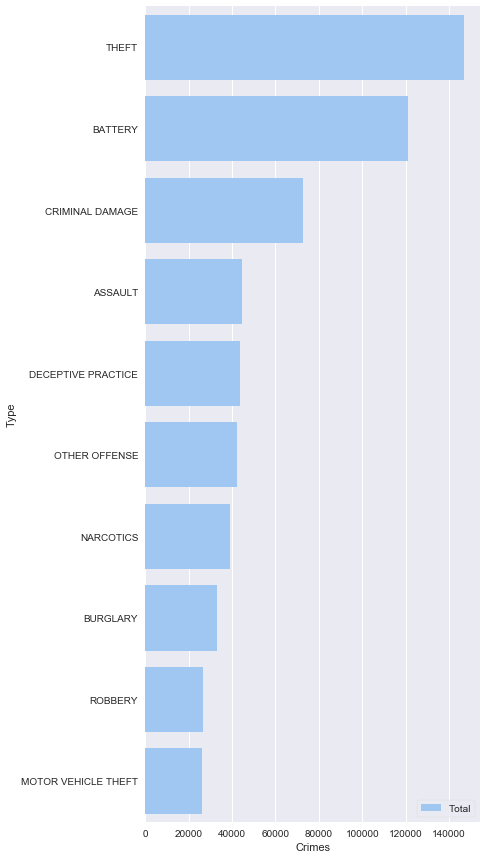

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crimes
sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Primary Type", data=df_crimecount.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

plt.show()

In [7]:
df['Date'] = pd.to_datetime(df["Date"]) #df1 = df.iloc[: 500,] to load faster
print(df.dtypes) #checking for Date in the datetime format
df.head()

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10150265,HY339722,2013-01-01,068XX S PERRY AVE,1570,SEX OFFENSE,PUBLIC INDECENCY,RESIDENCE,False,True,...,6.0,69.0,17,NaN,NaN,2013,8/7/2017 15:50,NaN,NaN,NaN
1,10368536,HZ104554,2013-01-01,094XX S LAFLIN ST,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,...,21.0,73.0,2,NaN,NaN,2013,1/7/2016 16:14,NaN,NaN,NaN
2,9933418,HY122754,2013-01-01,079XX S MAY ST,1050,HUMAN TRAFFICKING,COMMERCIAL SEX ACTS,STREET,False,False,...,17.0,71.0,26,NaN,NaN,2013,8/17/2015 15:03,NaN,NaN,NaN
3,10049724,HY231387,2013-01-01,020XX W BIRCHWOOD AVE,266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,49.0,1.0,2,NaN,NaN,2013,8/17/2015 15:03,NaN,NaN,NaN
4,10209747,HY396636,2013-01-01,100XX S WENTWORTH AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,9.0,49.0,11,NaN,NaN,2013,8/31/2015 15:43,NaN,NaN,NaN


In [8]:
#Finding the correlation between the dates and the frequency of the crime type,Let's focus reading the dataset based on the dates vs. the primary as this will be the main focus of the project's analysis

df_crimetype = df[["Date","Primary Type"]]
print df_crimetype.head()

        Date                Primary Type
0 2013-01-01                 SEX OFFENSE
1 2013-01-01  OFFENSE INVOLVING CHILDREN
2 2013-01-01           HUMAN TRAFFICKING
3 2013-01-01         CRIM SEXUAL ASSAULT
4 2013-01-01          DECEPTIVE PRACTICE


# Modelling the Crime Types based on the years

In [9]:
crimes_2013= df_crimetype[df_crimetype["Date"].isin(pd.date_range("2013-01-01", "2013-12-31"))]
#pd.DataFrame(pd.date_range(start='2013-01-01', end='2013-12-31', freq='D'), columns = ['Date'])
crimes_2013.tail()


,Date,Primary Type
2536,2013-12-17,DECEPTIVE PRACTICE
2551,2013-12-18,CRIM SEXUAL ASSAULT
2581,2013-12-20,DECEPTIVE PRACTICE
2669,2013-12-24,DECEPTIVE PRACTICE
2719,2013-12-27,INTIMIDATION


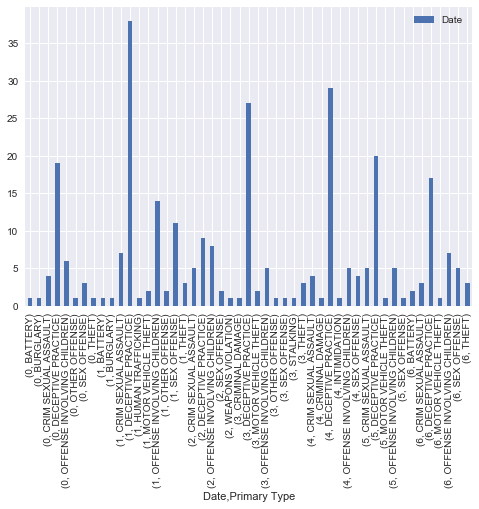

In [10]:
#aggDayWeek = df_crimetype.groupby([df.Date.dt.dayofweek, 'Primary Type']).count()
aggDayWeek2013 = crimes_2013.groupby([df.Date.dt.dayofweek, 'Primary Type']).count()
aggDayWeek2013.plot.bar()
#aggDayWeek.Date[0].sort_values(ascending=False)

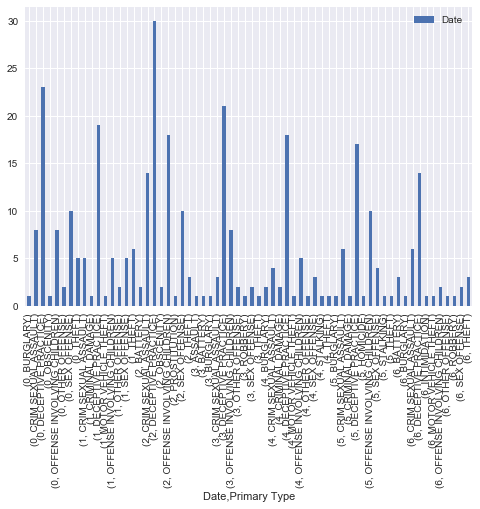

In [11]:
crimes_2014= df_crimetype[df_crimetype["Date"].isin(pd.date_range("2014-01-01", "2014-12-31"))]
aggDayWeek2014 = crimes_2014.groupby([df.Date.dt.dayofweek, 'Primary Type']).count()
aggDayWeek2014.plot.bar()

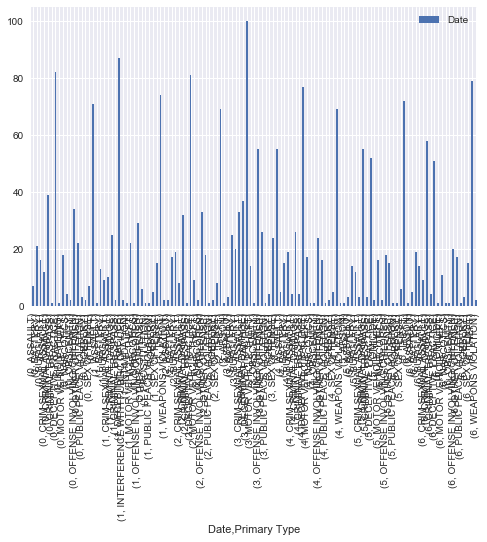

In [12]:

crimes_2015= df_crimetype[df_crimetype["Date"].isin(pd.date_range("2015-01-01", "2015-12-31"))]
aggDayWeek2015 = crimes_2015.groupby([df.Date.dt.dayofweek, 'Primary Type']).count()
aggDayWeek2015.plot.bar()

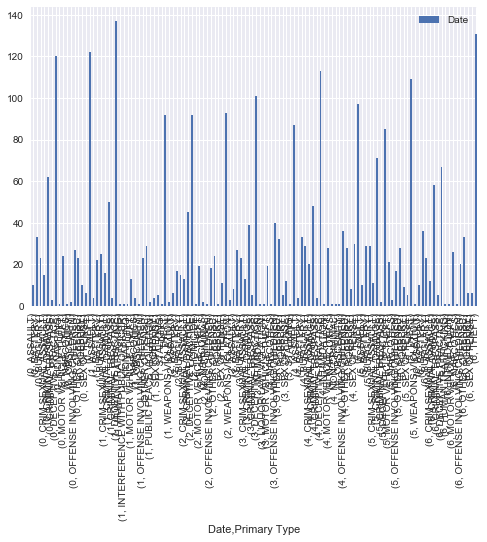

In [13]:
crimes_2016= df_crimetype[df_crimetype["Date"].isin(pd.date_range("2016-01-01", "2016-12-31"))]
aggDayWeek2016 = crimes_2016.groupby([df.Date.dt.dayofweek, 'Primary Type']).count()
aggDayWeek2016.plot.bar()

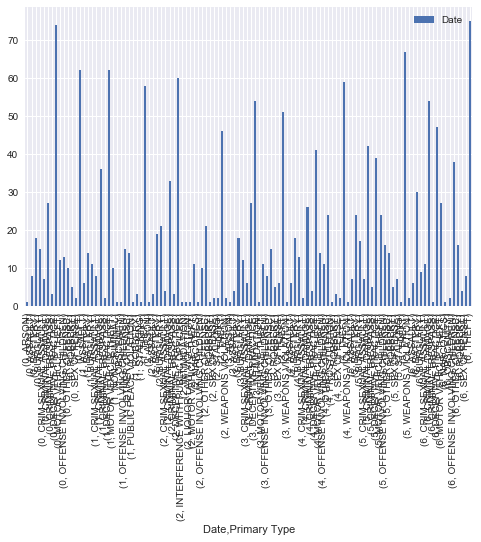

In [14]:
crimes_2017= df_crimetype[df_crimetype["Date"].isin(pd.date_range("2017-01-01", "2017-08-04"))]
aggDayWeek2017 = crimes_2017.groupby([df.Date.dt.dayofweek, 'Primary Type']).count()
aggDayWeek2017.plot.bar()

In [21]:
aggDayWeek2013

Date
Date Primary Type                    
0    BATTERY                        1
     BURGLARY                       1
     CRIM SEXUAL ASSAULT            4
     DECEPTIVE PRACTICE            19
     OFFENSE INVOLVING CHILDREN     6
     OTHER OFFENSE                  1
     SEX OFFENSE                    3
     THEFT                          1
1    BATTERY                        1
     BURGLARY                       1
     CRIM SEXUAL ASSAULT            7
     DECEPTIVE PRACTICE            38
     HUMAN TRAFFICKING              1
     MOTOR VEHICLE THEFT            2
     OFFENSE INVOLVING CHILDREN    14
     OTHER OFFENSE                  2
     SEX OFFENSE                   11
     THEFT                          3
2    CRIM SEXUAL ASSAULT            5
     DECEPTIVE PRACTICE             9
     OFFENSE INVOLVING CHILDREN     8
     SEX OFFENSE                    2
     WEAPONS VIOLATION              1
3    CRIMINAL DAMAGE                1
     DECEPTIVE PRACTICE            27
     MOTOR VEHICLE THEFT            2
     OFFENSE INVOLVING CHILDREN     5
     OTHER OFFENSE                  1
     SEX OFFENSE                    1
     STALKING                       1
     THEFT                          3
4    CRIM SEXUAL ASSAULT            4
     CRIMINAL DAMAGE                1
     DECEPTIVE PRACTICE            29
     INTIMIDATION                   1
     OFFENSE INVOLVING CHILDREN     5
     SEX OFFENSE                    4
5    CRIM SEXUAL ASSAULT            5
     DECEPTIVE PRACTICE            20
     MOTOR VEHICLE THEFT            1
     OFFENSE INVOLVING CHILDREN     5
     SEX OFFENSE                    1
6    BATTERY                        2
     CRIM SEXUAL ASSAULT            3
     DECEPTIVE PRACTICE            17
     MOTOR VEHICLE THEFT            1
     OFFENSE INVOLVING CHILDREN     7
     SEX OFFENSE                    5
     THEFT                          3

In [16]:
aggDayWeek2013.describe()

,Date
count,49.000000
mean,6.040816
std,8.103392
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,38.000000


# The null and alternate hypothesis:

Null Hypothesis is when the sample mean of Crime Type is related to the Day it occured. 
The Alternate Hypothesis is the converse result, of Crime Type is NOT related to the Day it occured. 

In [19]:
from scipy import stats
stats.chi2_contingency(aggDayWeek2013)

(0.0, 1.0, 0, array([[  1.],
        [  1.],
        [  4.],
        [ 19.],
        [  6.],
        [  1.],
        [  3.],
        [  1.],
        [  1.],
        [  1.],
        [  7.],
        [ 38.],
        [  1.],
        [  2.],
        [ 14.],
        [  2.],
        [ 11.],
        [  3.],
        [  5.],
        [  9.],
        [  8.],
        [  2.],
        [  1.],
        [  1.],
        [ 27.],
        [  2.],
        [  5.],
        [  1.],
        [  1.],
        [  1.],
        [  3.],
        [  4.],
        [  1.],
        [ 29.],
        [  1.],
        [  5.],
        [  4.],
        [  5.],
        [ 20.],
        [  1.],
        [  5.],
        [  1.],
        [  2.],
        [  3.],
        [ 17.],
        [  1.],
        [  7.],
        [  5.],
        [  3.]]))

In [20]:
critz =stats.norm.ppf(0.975)
print(critz)

1.95996398454


In [22]:
ward1 = df.copy()[df['Ward'] == 1.0]
ward1.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
15,10067128,HY255919,2013-01-01 00:00:00,019XX N MILWAUKEE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,1.0,22.0,11,NaN,NaN,2013,8/17/2015 15:03,NaN,NaN,NaN
137,10272489,HY460153,2013-01-01 12:00:00,016XX N FRANCISCO AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,1.0,24.0,11,NaN,NaN,2013,10/14/2015 15:52,NaN,NaN,NaN
145,10249159,HY436236,2013-01-01 12:00:00,016XX W WABANSIA AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,1.0,24.0,11,NaN,NaN,2013,9/30/2015 15:35,NaN,NaN,NaN
174,9829213,HX478833,2013-01-03 09:00:00,015XX N OAKLEY BLVD,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,1.0,24.0,11,NaN,NaN,2013,8/17/2015 15:03,NaN,NaN,NaN
271,10970152,JA292774,2013-02-01 08:15:00,013XX N CLEAVER ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,...,1.0,24.0,11,NaN,NaN,2013,6/6/2017 15:48,NaN,NaN,NaN


In [23]:
import numpy as np
ward1.groupby('Location Description')['Case Number'].agg(np.count_nonzero).sort_values(ascending = False)

Location Description
STREET                               3690
RESIDENCE                            1182
APARTMENT                             998
SIDEWALK                              844
OTHER                                 581
SMALL RETAIL STORE                    464
RESIDENCE-GARAGE                      429
PARKING LOT/GARAGE(NON.RESID.)        419
RESTAURANT                            391
VEHICLE NON-COMMERCIAL                301
GROCERY FOOD STORE                    262
BAR OR TAVERN                         256
ALLEY                                 248
RESIDENTIAL YARD (FRONT/BACK)         247
RESIDENCE PORCH/HALLWAY               238
DEPARTMENT STORE                      230
SCHOOL, PUBLIC, BUILDING              177
ATHLETIC CLUB                          91
DRUG STORE                             91
COMMERCIAL / BUSINESS OFFICE           86
CTA TRAIN                              68
PARK PROPERTY                          62
BANK                                   57
GAS STATION  

In [24]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, format = '%m/%d/%Y %I:%M:%S %p'))

In [25]:
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day of Week'] = df['Date'].apply(lambda x: x.weekday())
df['Hour'] = df['Date'].apply(lambda x: x.hour)
df.sort_values(by = 'Date', inplace = True)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day of Week,Hour
0,10150265,HY339722,2013-01-01,068XX S PERRY AVE,1570,SEX OFFENSE,PUBLIC INDECENCY,RESIDENCE,False,True,...,NaN,NaN,2013,8/7/2017 15:50,NaN,NaN,NaN,1,1,0
21,10363410,HY555318,2013-01-01,014XX N TALMAN AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,False,False,...,NaN,NaN,2013,12/31/2015 15:54,NaN,NaN,NaN,1,1,0
22,10843424,JA146623,2013-01-01,057XX S MARYLAND AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,HOSPITAL BUILDING/GROUNDS,False,True,...,NaN,NaN,2013,2/9/2017 15:51,NaN,NaN,NaN,1,1,0
23,9647367,HX298349,2013-01-01,072XX S PEORIA ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,...,NaN,NaN,2013,8/17/2015 15:03,NaN,NaN,NaN,1,1,0
24,9594163,HX244432,2013-01-01,009XX N HAMLIN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,NaN,NaN,2013,8/17/2015 15:03,NaN,NaN,NaN,1,1,0


In [26]:
df.set_index('Date', inplace = True)

In [27]:
unique_cases_per_day = df.resample('D')['Case Number'].nunique()
unique_cases_per_day.head()

Date
2013-01-01    4
2013-01-02    6
2013-01-03    6
2013-01-04    2
2013-01-05    5
Freq: D, Name: Case Number, dtype: int64

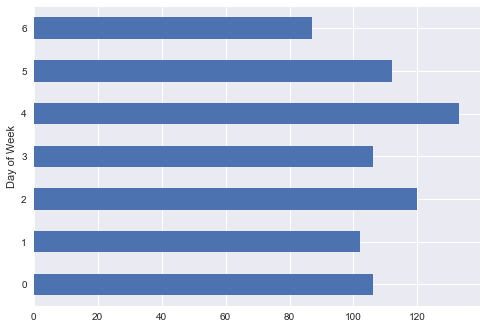

In [28]:
beat1621 = df.loc[df['Beat'] == 1621]
crimes = beat1621.groupby('Day of Week')['Case Number'].nunique()
crimes.plot(kind='barh')
plt.show()

In [29]:
df_beat = df.groupby([pd.TimeGrouper('D'), 'Beat'])['Case Number'].nunique()
df_beat = df_beat.reset_index()
df_beat.columns = ['Date', 'Beat', 'Case Number']
df_beat.head()

,Date,Beat,Case Number
0,2013-01-01,113,1
1,2013-01-01,114,1
2,2013-01-01,123,2
3,2013-01-01,133,1
4,2013-01-01,212,1


In [30]:
df_beat.groupby('Beat')['Date'].nunique().head()

Beat
111    888
112    898
113    822
114    823
121    798
Name: Date, dtype: int64

In [31]:
df_beat['Year'] = df_beat['Date'].apply(lambda x: x.year)
df_beat['Month'] = df_beat['Date'].apply(lambda x: x.month)
df_beat['DayWeek'] = df_beat['Date'].apply(lambda x: x.weekday())
df_beat.head()

,Date,Beat,Case Number,Year,Month,DayWeek
0,2013-01-01,113,1,2013,1,1
1,2013-01-01,114,1,2013,1,1
2,2013-01-01,123,2,2013,1,1
3,2013-01-01,133,1,2013,1,1
4,2013-01-01,212,1,2013,1,1


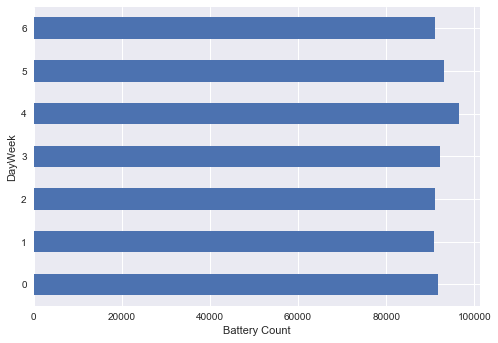

In [32]:
battcrimes = df_beat.groupby('DayWeek')['Case Number'].sum()
battcrimes.plot(kind='barh').set_xlabel('Battery Count')
plt.show()

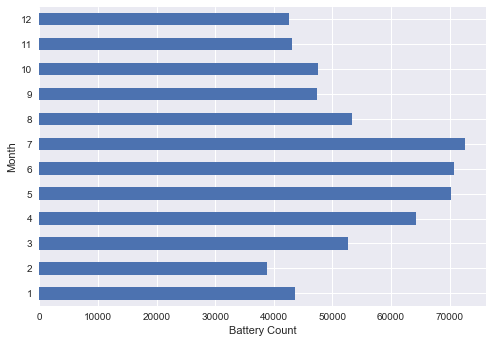

In [33]:
battcrimes = df_beat.groupby('Month')['Case Number'].sum()
battcrimes.plot(kind='barh').set_xlabel('Battery Count')
plt.show()

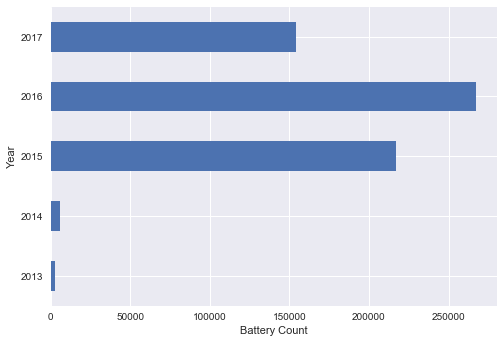

In [34]:
battcrimes = df_beat.groupby('Year')['Case Number'].sum()
battcrimes.plot(kind='barh').set_xlabel('Battery Count')
plt.show()

In [35]:
df = df.groupby([pd.TimeGrouper('D'), 'Ward'])['Case Number'].nunique().reset_index()
df.columns = ['Date', 'Ward', 'BatCount']
df.head()

,Date,Ward,BatCount
0,2013-01-01,1.0,3
1,2013-01-01,2.0,6
2,2013-01-01,3.0,3
3,2013-01-01,4.0,6
4,2013-01-01,5.0,7
